## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

Importando as bibliotecas e adquirindo os dados, separando-os em variáveis explicativas e variável resposta. Não usarei a variável B por questões éticas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv("housing.csv")
X = boston.drop(columns=['B', 'MEDV'])
y = boston.MEDV

Explicativas

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33


Resposta

In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

Verificação de valores nulos (scikitlearn)

In [4]:
df = pd.concat((X, y), axis=1)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Matriz de correlação

In [5]:
df.corr().sort_values(by='MEDV', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,-0.737663,1.000000
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


Separação da base em dados de treino e teste para a árvore de regressão

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Criando e treinando a árvore de regressão

In [7]:
reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=25, random_state=0)

reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=25, random_state=0)

Calculando o R-quadrado para a árvore criada

In [8]:
r2 = reg_tree.score(X_train, y_train)

r2

0.8076924626264236

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [9]:
path = reg_tree.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([ 0.        ,  0.20059105,  0.34731899,  0.44345898,  0.55106466,
         0.63988128,  0.7431174 ,  1.78803077,  2.35760378,  8.25810579,
        13.12937518, 40.44427094]),
 'impurities': array([16.40541669, 16.60600774, 16.95332673, 17.39678571, 17.94785038,
        18.58773166, 19.33084906, 21.11887983, 23.47648362, 31.73458941,
        44.86396459, 85.30823553])}

Text(0, 0.5, 'Impureza total das folhas')

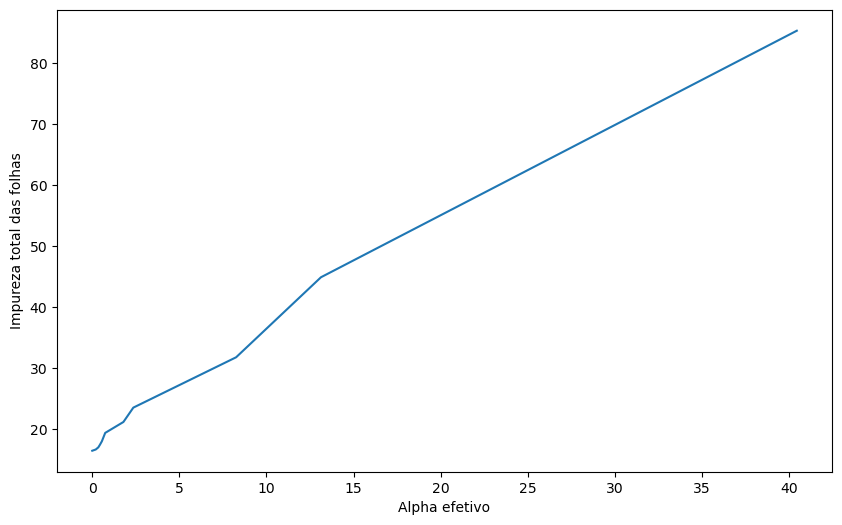

In [10]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [11]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

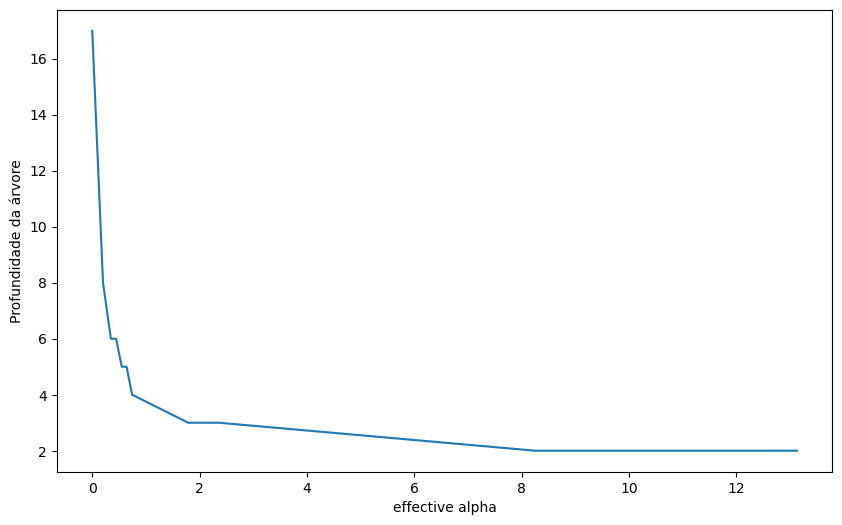

In [12]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [13]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Melhor valor de ccp_alpha: 0.200591
Menor MSE no conjunto de teste: 27.000846


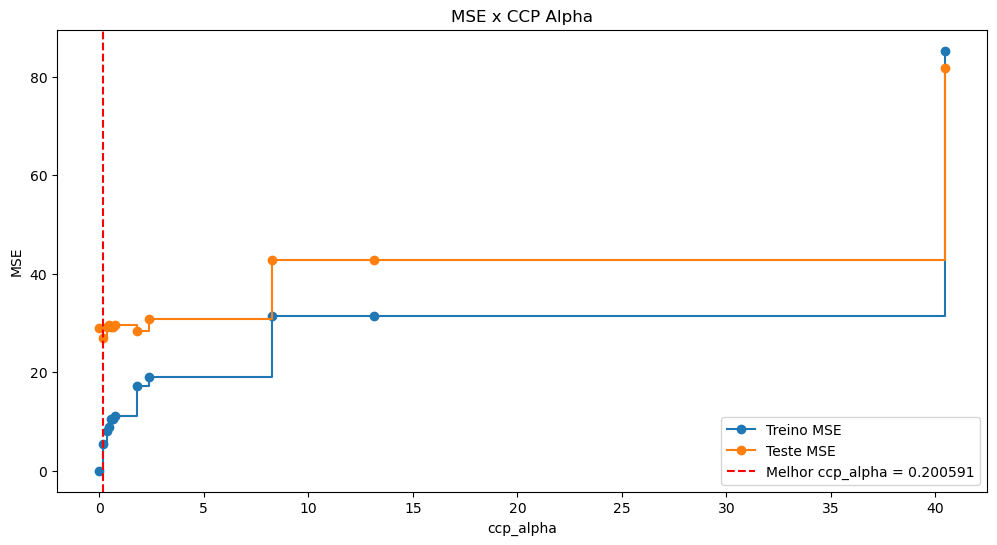

In [14]:
# Encontrar o ccp_alpha que minimiza o MSE no conjunto de teste
melhor_ccp_alpha = ccp_alphas[np.argmin(test_scores)]
print(f"Melhor valor de ccp_alpha: {melhor_ccp_alpha:.6f}")
print(f"Menor MSE no conjunto de teste: {min(test_scores):.6f}")

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, train_scores, label='Treino MSE', marker='o', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, label='Teste MSE', marker='o', drawstyle="steps-post")
plt.axvline(x=melhor_ccp_alpha, linestyle='--', color='r', label=f'Melhor ccp_alpha = {melhor_ccp_alpha:.6f}')
plt.xlabel("ccp_alpha")
plt.ylabel("MSE")
plt.title("MSE x CCP Alpha")
plt.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [15]:
# Árvore com menor MSE
reg_tree_pruned = clfs[test_scores.index(min(test_scores))]

# R-quadrado
reg_tree_pruned.score(X_train, y_train)

0.9356472708447403

### 7. Visualize esta árvore.

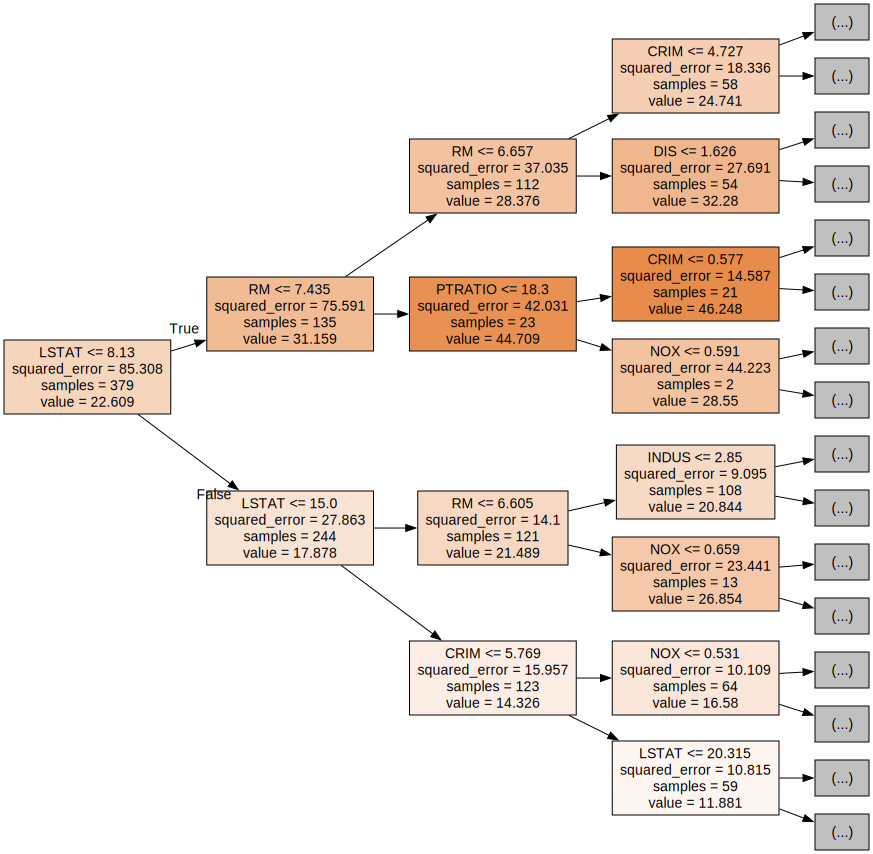

In [16]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(reg_tree_pruned, out_file=None, 
                                feature_names=X.columns,
                                filled=True,
                                max_depth=3, # mostrando até o terceiro nível apenas 
                                rotate=True) # #rotação, para melhorar ainda mais a visualização

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph